# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 622


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"
unit = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    params = {
    'appid':weather_api_key,
    'q': city,
    'units':unit
    }
    # Create endpoint URL with each city
    #city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    response = requests.get(url, params=params).json()
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #city_weather =

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | axim
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | samba
Processing Record 9 of Set 1 | salinopolis
Processing Record 10 of Set 1 | dwarka
Processing Record 11 of Set 1 | susuman
Processing Record 12 of Set 1 | labasa
Processing Record 13 of Set 1 | qaqortoq
Processing Record 14 of Set 1 | dakhla
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | mount pearl
Processing Record 17 of Set 1 | nueva esperanza
Processing Record 18 of Set 1 | petropavlovsk-kamchatsky
Processing Record 19 of Set 1 | anna regina
Processing Record 20 of Set 1 | banikoara
Processing Record 21 of Set 1 | saipan
Processing Record 22

In [11]:
city_data

[{'City': 'port-aux-francais',
  'Lat': -49.35,
  'Lng': 70.2167,
  'Max Temp': 2.26,
  'Humidity': 74,
  'Cloudiness': 96,
  'Wind Speed': 12.62,
  'Country': 'TF',
  'Date': 1698041699},
 {'City': 'axim',
  'Lat': 4.8699,
  'Lng': -2.2405,
  'Max Temp': 25.26,
  'Humidity': 91,
  'Cloudiness': 96,
  'Wind Speed': 3.07,
  'Country': 'GH',
  'Date': 1698041700},
 {'City': 'blackmans bay',
  'Lat': -43.0167,
  'Lng': 147.3167,
  'Max Temp': 18.62,
  'Humidity': 62,
  'Cloudiness': 68,
  'Wind Speed': 1.34,
  'Country': 'AU',
  'Date': 1698041700},
 {'City': 'puerto ayora',
  'Lat': -0.7393,
  'Lng': -90.3518,
  'Max Temp': 23.17,
  'Humidity': 84,
  'Cloudiness': 85,
  'Wind Speed': 4.49,
  'Country': 'EC',
  'Date': 1698041700},
 {'City': 'waitangi',
  'Lat': -43.9535,
  'Lng': -176.5597,
  'Max Temp': 8.79,
  'Humidity': 77,
  'Cloudiness': 85,
  'Wind Speed': 0.45,
  'Country': 'NZ',
  'Date': 1698041569},
 {'City': 'cabo san lucas',
  'Lat': 22.8909,
  'Lng': -109.9124,
  'Max Temp'

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
print(city_data_df.count())
city_data_df

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.26,74,96,12.62,TF,1698041699
1,axim,4.8699,-2.2405,25.26,91,96,3.07,GH,1698041700
2,blackmans bay,-43.0167,147.3167,18.62,62,68,1.34,AU,1698041700
3,puerto ayora,-0.7393,-90.3518,23.17,84,85,4.49,EC,1698041700
4,waitangi,-43.9535,-176.5597,8.79,77,85,0.45,NZ,1698041569
...,...,...,...,...,...,...,...,...,...
591,mukalla,14.5425,49.1242,32.81,35,92,2.78,YE,1698041832
592,kasane,-17.8167,25.1500,24.05,60,40,3.60,BW,1698041832
593,richfield,44.8833,-93.2830,11.76,79,100,3.60,US,1698041798
594,usogorsk,63.4106,48.6872,-0.68,79,99,4.20,RU,1698041832


In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.26,74,96,12.62,TF,1698041699
1,axim,4.8699,-2.2405,25.26,91,96,3.07,GH,1698041700
2,blackmans bay,-43.0167,147.3167,18.62,62,68,1.34,AU,1698041700
3,puerto ayora,-0.7393,-90.3518,23.17,84,85,4.49,EC,1698041700
4,waitangi,-43.9535,-176.5597,8.79,77,85,0.45,NZ,1698041569


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.26,74,96,12.62,TF,1698041699
1,axim,4.8699,-2.2405,25.26,91,96,3.07,GH,1698041700
2,blackmans bay,-43.0167,147.3167,18.62,62,68,1.34,AU,1698041700
3,puerto ayora,-0.7393,-90.3518,23.17,84,85,4.49,EC,1698041700
4,waitangi,-43.9535,-176.5597,8.79,77,85,0.45,NZ,1698041569


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

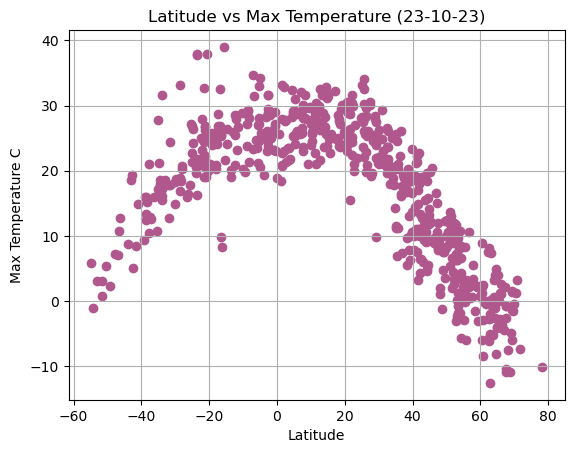

In [48]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],color='#B0578D',)
# Incorporate the other graph properties
plt.title('Latitude vs Max Temperature (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature C")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/latvmaxtemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

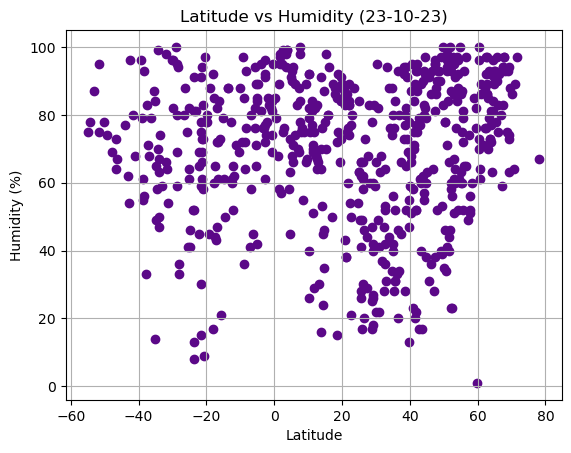

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],color='#5B0888',)
# Incorporate the other graph properties
plt.title('Latitude vs Humidity (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/latvhum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

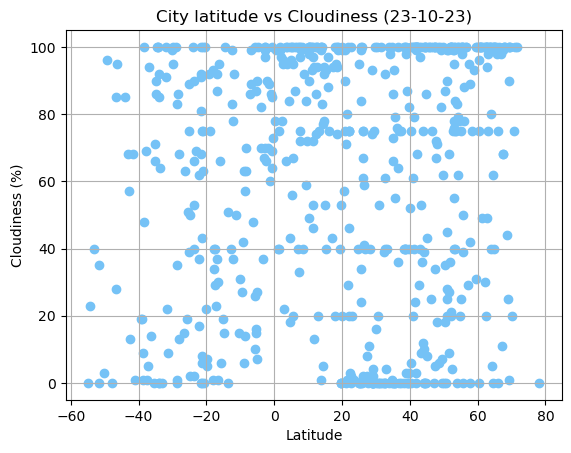

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],color='#75C2F6',)
# Incorporate the other graph properties
plt.title('City latitude vs Cloudiness (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/latvcloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

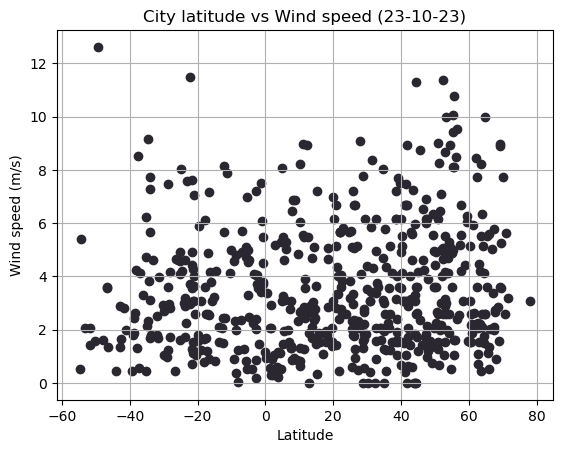

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],color='#2B2730',)
# Incorporate the other graph properties
plt.title('City latitude vs Wind speed (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Wind speed (m/s)")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/latvwind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df.Lat >= 0]


# Display sample data
northern_hemi_df.head()
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df.Lat < 0]


# Display sample data

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.26,74,96,12.62,TF,1698041699
2,blackmans bay,-43.0167,147.3167,18.62,62,68,1.34,AU,1698041700
3,puerto ayora,-0.7393,-90.3518,23.17,84,85,4.49,EC,1698041700
4,waitangi,-43.9535,-176.5597,8.79,77,85,0.45,NZ,1698041569
7,salinopolis,-0.6136,-47.3561,26.87,81,64,5.49,BR,1698041701


In [46]:
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,axim,4.8699,-2.2405,25.26,91,96,3.07,GH,1698041700
5,cabo san lucas,22.8909,-109.9124,27.09,80,20,5.81,MX,1698041627
6,samba,32.5667,75.1167,26.49,36,0,1.59,IN,1698041701
8,dwarka,22.2394,68.9678,30.34,54,3,4.06,IN,1698041421
9,susuman,62.7833,148.1667,-12.55,97,94,0.72,RU,1698041599


## Northern Hemisphere: Max Temperature vs Latitude (Linear Regression)

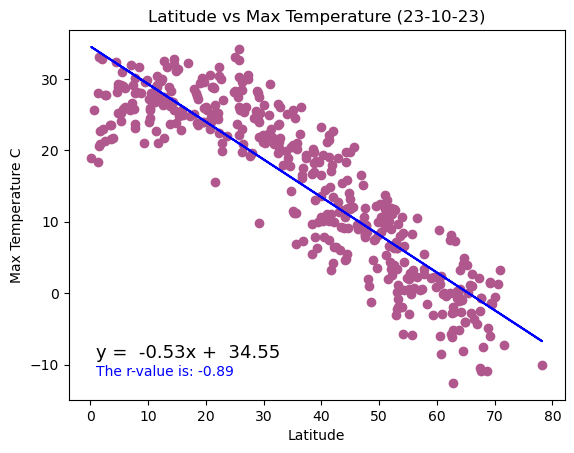

In [64]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#B0578D')
plt.plot(x_values,regress_values, color='b')
plt.annotate(line_eq,(1,-9), fontsize=13, color="black")
plt.text(1,-11.5,f'The r-value is: {round(rvalue,2)}',color= 'blue')
# Incorporate the other graph properties
plt.title('Latitude vs Max Temperature (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature C")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvmaxtemp2.png")

# Show plot
plt.show()

## Southern Hemisphere: Max Temperature vs Latitude (Linear Regression)

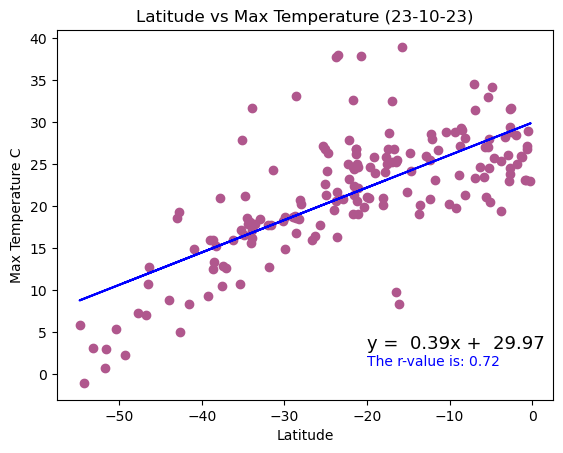

In [65]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#B0578D')
plt.plot(x_values,regress_values, color='b')
plt.annotate(line_eq,(-20,3), fontsize=13, color="black")
plt.text(-20,1,f'The r-value is: {round(rvalue,2)}',color= 'blue')
# Incorporate the other graph properties
plt.title('Latitude vs Max Temperature (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature C")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvmaxtemp3.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Both northen hemisphere data and southern hemisphere data have a direct relation between latitude and temperature, when the closer tot zero (ecuador) the higher the temperature is, the further from zero, the lowet it gets. Hence the strong correlation.

### Humidity vs. Latitude Linear Regression Plot

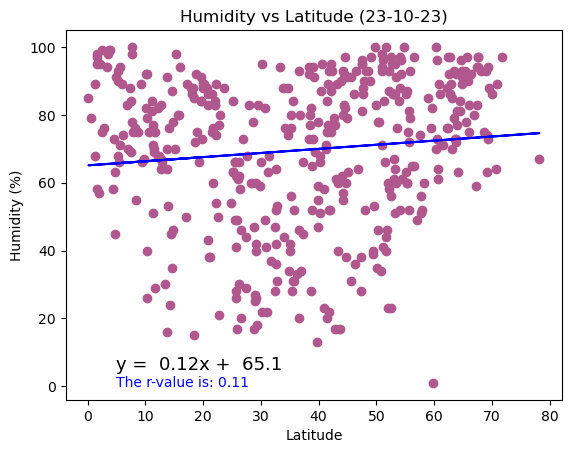

In [77]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#B0578D')
plt.plot(x_values,regress_values, color='b')
plt.annotate(line_eq,(5,5), fontsize=13, color="black")
plt.text(5,0,f'The r-value is: {round(rvalue,2)}',color= 'blue')
# Incorporate the other graph properties
plt.title('Humidity vs Latitude (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvhum2.png")

# Show plot
plt.show()

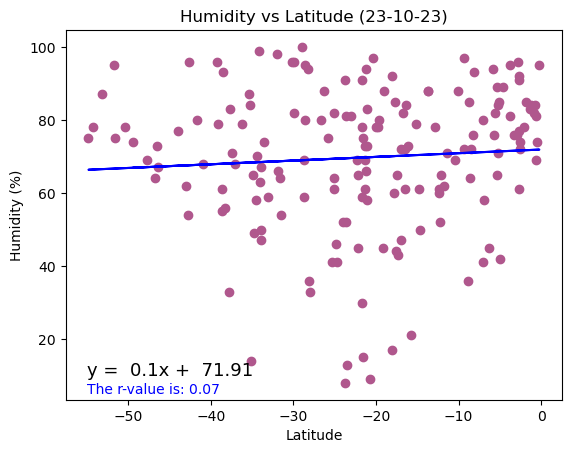

In [78]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#B0578D')
plt.plot(x_values,regress_values, color='b')
plt.annotate(line_eq,(-55,10), fontsize=13, color="black")
plt.text(-55,5,f'The r-value is: {round(rvalue,2)}',color= 'blue')
# Incorporate the other graph properties
plt.title('Humidity vs Latitude (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvhum3.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Both types of data show a very weak linear correlation, meaning the variables have not a linear impact on each other, if they have any relation at all. Practically, it means humidity does not depend on the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

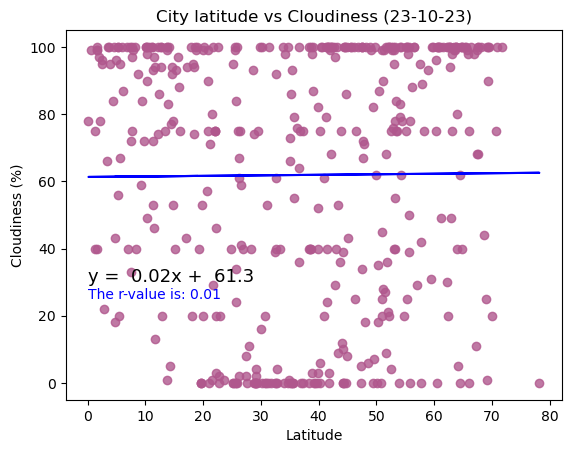

In [89]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#B0578D',alpha=0.8)
plt.plot(x_values,regress_values, color='b')
plt.annotate(line_eq,(0,30), fontsize=13, color="black")
plt.text(0,25,f'The r-value is: {round(rvalue,2)}',color= 'blue')
# Incorporate the other graph properties
plt.title('City latitude vs Cloudiness (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvcloud2.png")

# Show plot
plt.show()

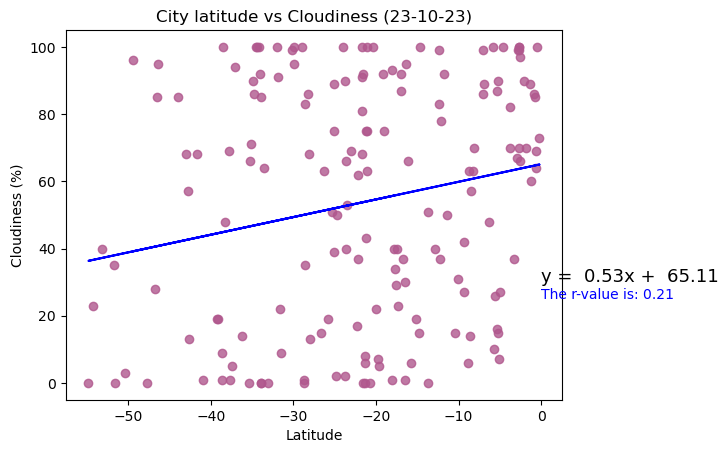

In [88]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#B0578D',alpha=0.8)
plt.plot(x_values,regress_values, color='b')
plt.annotate(line_eq,(0,30), fontsize=13, color="black")
plt.text(0,25,f'The r-value is: {round(rvalue,2)}',color= 'blue')
# Incorporate the other graph properties
plt.title('City latitude vs Cloudiness (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvcloud3.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Both types of data show a very weak linear correlation, even the data distribution suggest that no relation between the variables exists. Meaning latitude is not a good predictor for cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

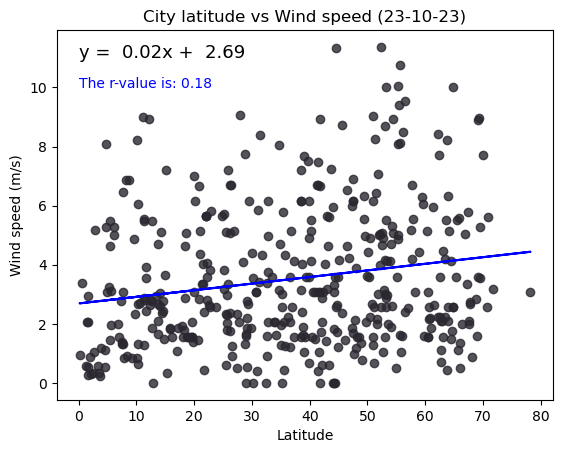

In [93]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#2B2730',alpha=0.8)
plt.plot(x_values,regress_values, color='b')
plt.annotate(line_eq,(0,11), fontsize=13, color="black")
plt.text(0,10,f'The r-value is: {round(rvalue,2)}',color= 'blue')
# Incorporate the other graph properties
plt.title('City latitude vs Wind speed (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Wind speed (m/s)")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvwind2.png")

# Show plot
plt.show()

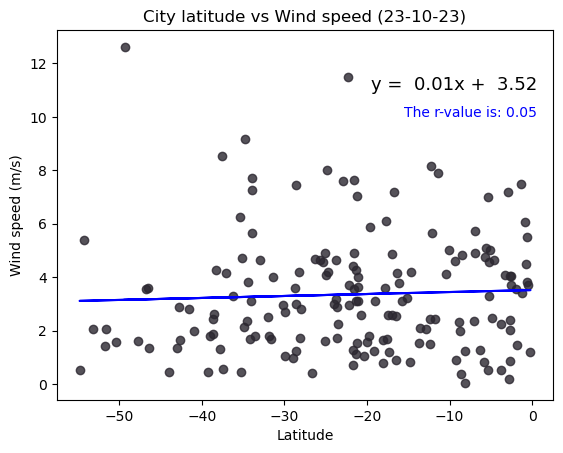

In [101]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = b0 + b1*x_values
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2))
plt.scatter(x_values,y_values,color='#2B2730',alpha=0.8)
plt.plot(x_values,regress_values, color='b')
plt.annotate(line_eq,(-19.5,11), fontsize=13, color="black")
plt.text(-15.5,10,f'The r-value is: {round(rvalue,2)}',color= 'blue')
# Incorporate the other graph properties
plt.title('City latitude vs Wind speed (23-10-23)')
plt.xlabel("Latitude")
plt.ylabel("Wind speed (m/s)")
plt.grid(visible=False)
# Save the figure
plt.savefig("output_data/latvwind2.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Both types of data show a very weak linear correlation, as before the data distribution suggest that no relation between the variables exists. In this case the data presents a different pattern, but no explanation can be given by analysing these two variables.